# Redes de Hopfield
Dalia Camacho

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib.cm as cm;
import random;
random.seed(48597);

Definimos una matriz con los valores de la imagen que vamos utilizar para probar las redes de Hopfield como memoria asociativa. 

In [2]:
#Matriz con los valores que generan la imagen.
IMG = np.array([[0,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,1,1],
                [0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1],
                [0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,1,1],
                [0,1,1,0,0,1,0,1,0,1,1,1,0,1,1,1,0,1,0,1]
               ]);

Ahora graficamos la imagen inicial.

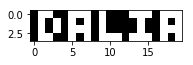

In [3]:
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(IMG, cmap=cm.Greys_r);

Ahora convertimos la matriz en un vector.

In [4]:
IMG_vec = np.array(IMG).flatten();

Generamos los pesos con los que se calcula la energía de la red. La energía de la red se define como: $-\sum_{i<j}s_i\cdot s_j \cdot w_{ij}$. Los pesos que definimos minimizan la energía de la red y se construyen como $w_{ij}=w_{ji}= 4(s_i-\frac{1}{2})\cdot (s_j-\frac{1}{2})$, donde $s$ es el vector que contiene todas las entradas de la matriz original. 

In [5]:
Weights = np.zeros((80,80));
for i in range(0,79):
    for j in range (i+1,80):
        Weights[i,j] = 4.*(IMG_vec[i]-1/2)*(IMG_vec[j]-1/2);
        Weights[j,i] = Weights[i,j];
        
        
Weights 

array([[ 0., -1., -1., ..., -1.,  1., -1.],
       [-1.,  0.,  1., ...,  1., -1.,  1.],
       [-1.,  1.,  0., ...,  1., -1.,  1.],
       ...,
       [-1.,  1.,  1., ...,  0., -1.,  1.],
       [ 1., -1., -1., ..., -1.,  0., -1.],
       [-1.,  1.,  1., ...,  1., -1.,  0.]])

Ahora definimos las funciones Efun y DeltaEi. Efun calcula la energía de la red para una configuración $s$, pesos $w$ y número de entradas $n$. Con DeltaEi se obtiene la diferencia de la energía en la red cuando una entrada toma valor $0$ o $1$.

In [6]:
def Efun(s,w, n):
    suma = 0;
    for i in range(0,n-1):
        for j in range (i+1,n):
            suma = suma + s[i]*s[j]*w[i,j];
    return -suma;

def DeltaEi(s,w,n,i):
    suma = 0;
    for j in range(1,n):
        suma = suma + s[j]*w[i,j];
    return suma;

La función learn modifica las entradas del vector $s$ de tal forma que la energía de la red disminuye. El proceso termina cuando ya no hay cambios en las entradas de $s$ o bien cuando se llega a un número máximo de iteraciones en el proceso.

In [7]:
def learn(s,w,n, MaxLoops):
    Loops    = 0;
    change   = True;
    while(Loops < MaxLoops and change==True):
        change = False;
        for i in range(0,n):
            Delta = DeltaEi(s,w,n,i);
            if (Delta > 0 and s[i] == 0):
                s[i]   = 1;
                change = True;
            if (Delta < 0 and s[i]==1):
                s[i]   = 0;
                change = True;
        Loops = Loops + 1;
    return s, change, Loops

La función Alter_IMG toma la imagen original, número de filas y columnas y la proporción de entradas que serán modificadas escrito como porcentaje. De forma aleatoria se eligen las entradas que van a ser modificadas y si son cero se les da un uno y viceversa.

In [8]:
def Alter_IMG(IMG,mrow,ncol,perc):
    n       = mrow*ncol;
    changes = int(np.floor(n*perc/100));
    which_rows =  np.random.choice(mrow, changes);
    which_cols =  np.random.choice(ncol, changes);    
    for i in range(0, changes):
        if IMG[which_rows[i], which_cols[i]]==0:
            IMG[which_rows[i], which_cols[i]]=1;
        else:
            IMG[which_rows[i], which_cols[i]]=0;
    return IMG;

### Cambiar 10% de las entradas

Cambiamos 10% de las entradas de la matriz con la que se generó la matriz de pesos.

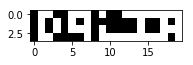

In [9]:
IMG2 = Alter_IMG(IMG,4,20,10);
fig  = plt.figure();
ax1  = fig.add_subplot(121);
ax1.imshow(IMG2, cmap=cm.Greys_r);

Convertimos la matriz en vector y le aplicamos la función learn.

In [10]:
IMG2_vec    = np.array(IMG2).flatten();
IMG2_recall = learn(IMG2_vec, Weights,80,10);
print(IMG2_recall[2], "loops needed.");

2 loops needed.


Ahora convertimos el vector en matriz y mostramos la imagen.

In [11]:
Recall=IMG2_recall[0].reshape(4,20);

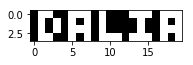

In [12]:
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(Recall, cmap=cm.Greys_r);

Podemos observar que se logra reproducir el patrón inicial.

### Cambiar 25% de las entradas

Ahora cambiamos 25% de las entradas de la matriz con la que se generó la matriz de pesos.

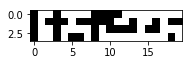

In [13]:
IMG2 =Alter_IMG(IMG,4,20,25);
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(IMG2, cmap=cm.Greys_r);

Convertimos la matriz en vector y le aplicamos la función learn.

In [14]:
IMG2_vec = np.array(IMG2).flatten();
IMG2_recall =learn(IMG2_vec, Weights,80,10)
print(IMG2_recall[2], "loops needed.")

2 loops needed.


Ahora convertimos el vector en matriz y mostramos la imagen.

In [15]:
Recall=IMG2_recall[0].reshape(4,20);

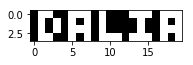

In [16]:
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(Recall, cmap=cm.Greys_r);

Nuevamente se logra reproducir el patrón inicial.

### Cambiar 50% de las entradas

Ahora cambiamos 50% de las entradas de la matriz con la que se generó la matriz de pesos.

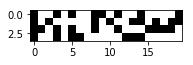

In [17]:
IMG2 =Alter_IMG(IMG,4,20,50);
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(IMG2, cmap=cm.Greys_r);

Convertimos la matriz en vector y le aplicamos la función learn.

In [18]:
IMG2_vec = np.array(IMG2).flatten();
IMG2_recall =learn(IMG2_vec, Weights,80,10)
print(IMG2_recall[2], "loops needed.")

2 loops needed.


Ahora convertimos el vector en matriz y mostramos la imagen.

In [19]:
Recall=IMG2_recall[0].reshape(4,20);

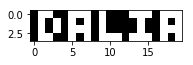

In [20]:
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(Recall, cmap=cm.Greys_r);

Nuevamente se logra reproducir el patrón inicial.

### Cambiar 75% de las entradas

Ahora cambiamos 75% de las entradas de la matriz con la que se generó la matriz de pesos.

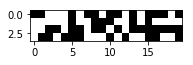

In [21]:
IMG2 =Alter_IMG(IMG,4,20,75);
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(IMG2, cmap=cm.Greys_r);

Convertimos la matriz en vector y le aplicamos la función learn.

In [22]:
IMG2_vec = np.array(IMG2).flatten();
IMG2_recall =learn(IMG2_vec, Weights,80,10);
print(IMG2_recall[2], "loops needed.")

3 loops needed.


Ahora convertimos el vector en matriz y mostramos la imagen.

In [23]:
Recall=IMG2_recall[0].reshape(4,20);

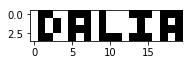

In [24]:
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(Recall, cmap=cm.Greys_r);

En este caso se obtuvo el patrón inverso (los ceros como unos y los unos como ceros).

### Cambiar 90% de las entradas

Ahora cambiamos 90% de las entradas de la matriz con la que se generó la matriz de pesos.

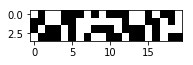

In [25]:
IMG2 =Alter_IMG(IMG,4,20,90);
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(IMG2, cmap=cm.Greys_r);

Convertimos la matriz en vector y le aplicamos la función learn.

In [26]:
IMG2_vec = np.array(IMG2).flatten();
IMG2_recall =learn(IMG2_vec, Weights,80,10);
print(IMG2_recall[2], "loops needed.");

2 loops needed.


Ahora convertimos el vector en matriz y mostramos la imagen.

In [27]:
Recall=IMG2_recall[0].reshape(4,20);

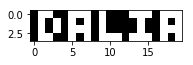

In [28]:
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(Recall, cmap=cm.Greys_r);

Nuevamente se logra reproducir el patrón inicial.

# Patrón inicial aleatorio

Ahora usamos un patrón aleatorio.

In [29]:
IMG3 = np.random.randint(2, size=(4, 20));

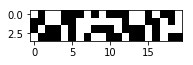

In [30]:
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(IMG2, cmap=cm.Greys_r);

In [31]:
IMG3_vec = np.array(IMG3).flatten();
IMG3_recall =learn(IMG3_vec, Weights,80,10);
print(IMG3_recall[2], "loops needed.");

2 loops needed.


Ahora convertimos el vector en matriz y mostramos la imagen.

In [32]:
Recall=IMG3_recall[0].reshape(4,20);

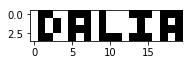

In [33]:
fig = plt.figure();
ax1 = fig.add_subplot(121);
ax1.imshow(Recall, cmap=cm.Greys_r);

En este caso aleatorio se encontró el patrón inverso.